<a href="https://colab.research.google.com/github/akshay310/FYP_KHCR/blob/main/FYP_KHCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import csv
import glob

In [ ]:
parent_folder_path = "C:/Users/akshay/Desktop/FYP_KHCR"

In [ ]:
digit_labels = list(range(10))
alphabet_labels = ['a', 'aaa', 'e', 'eee', 'u', 'uuu', 'ru', 'ye', 'yeee', 'ai', 'o', 'ooo', 'oww', 'am', 'aha','ka','kha','ga','gha','1_nya','ca','cha','ja','jha','2_nya','ta','ttha','dda','ddha','nna','tha','thaa','da','dha','na','pa','pha','ba','bha','ma','ya','ra','la','va','shea','sa','ha','laa']

In [ ]:
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

In [ ]:
with open('kannada_full_data.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

In [ ]:
train_x = []
train_y = []

In [ ]:
for label in digit_labels+alphabet_labels:
  dirList = glob.glob(os.path.join(parent_folder_path,str(label), "*.png"))

  for img_path in dirList:
    im = cv2.imread(img_path)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
    roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
    data=[]
    data.append(label)

    flattened_image = roi.flatten() / 255.0
    data.extend(flattened_image)

    train_x.append(flattened_image)
    train_y.append(label)

    with open('kannada_full_data.csv', 'a') as f:
      writer = csv.writer(f)
      writer.writerow(data)

In [ ]:
import os
import numpy as np

train_x = np.array(train_x)
train_y = np.array(train_y)

# Get current working directory
current_directory = os.getcwd()

# Save the training dataset as numpy arrays in the current directory
np.save(os.path.join(current_directory, "train_x.npy"), train_x)
np.save(os.path.join(current_directory, "train_y.npy"), train_y)

In [ ]:
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('kannada_full_data.csv',dtype=str)
duplicates = data[data.duplicated()]
data = data.drop_duplicates()
data = shuffle(data)
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5299,la,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4680,pha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5063,ya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1607843137254902,0.01568627450980392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1401,u,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,cha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1690,ru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4449,na,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np

X = data.drop(["label"],axis=1)
Y = data["label"]

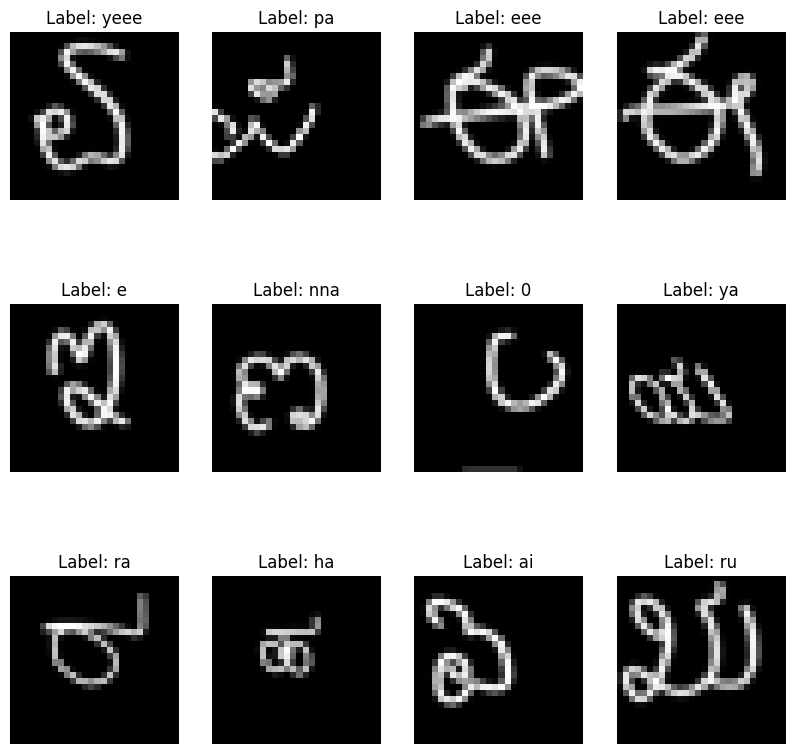

In [ ]:
import matplotlib.pyplot as plt
def display_shuffled_images(images, labels, rows, cols):
  combined_data = list(zip(images, labels))
  np.random.shuffle(combined_data)
  shuffled_images, shuffled_labels = zip(*combined_data)

  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

  for i in range(rows):
    for j in range(cols):
      idx = i*cols + j
      img = shuffled_images[idx].reshape(28, 28).astype(float)
      label = shuffled_labels[idx]

      axes[i, j].imshow(img, cmap='gray')
      axes[i, j].set_title(f"Label: {label}")
      axes[i, j].axis('off')

  plt.show()

num_rows = 3
num_cols = 4
display_shuffled_images(X.values, Y, num_rows, num_cols)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
train_x = np.load("train_x.npy")
train_y = np.load("train_y.npy")
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

Support Vector Classification(Classifier)

> Add blockquote



In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=6
                )
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=6)

In [ ]:
import joblib
joblib.dump(svm_model, "svm(digits+a-aha)")

['svm(digits+a-aha)']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Load the trained SVC model
svc_model = joblib.load("svm(digits+a-aha)")

# Assuming X_test_imputed and test_y are correctly loaded and preprocessed
predictions = svc_model.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, predictions) * 100
precision = precision_score(y_test, predictions, average='weighted') * 100
recall = recall_score(y_test, predictions, average='weighted') * 100
f1 = f1_score(y_test, predictions, average='weighted') * 100

# Print the metrics
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 85.26%
Precision: 87.39%
Recall: 85.26%
F1 Score: 85.43%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

joblib.dump(knn,"model/knn(digits+a-laa)")

FileNotFoundError: [Errno 2] No such file or directory: 'model/knn(digits+a-laa)'